In [62]:
#Pfunzo Madamela 34906304
#Importing necessary libraries  for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import numpy as np



In [63]:
# loading the dataset  and removing the ID column 
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
# the overview of the dataset
print("Dataset Shape : ", titanic.shape )
print("\nFeatures : ", titanic.columns.tolist())
print("\nTarget Variable : ", "survived (0 = No, 1 = Yes)")
titanic.info()


Dataset Shape :  (891, 15)

Features :  ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Target Variable :  survived (0 = No, 1 = Yes)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive       

In [65]:
#Handling any missing values in the dataset
print("Missing Values in each column:\n", titanic.isnull().sum())
print("\nTotal Missing Values in the dataset:", titanic.isnull().sum().sum())

#Handling missing values by filling or dropping
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(columns=['deck'], inplace=True)



Missing Values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Total Missing Values in the dataset: 869


C:\Users\pfunz\AppData\Local\Temp\ipykernel_12160\798269200.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\pfunz\AppData\Local\Temp\ipykernel_12160\798269200.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [66]:
#  creating the features
categorical_features =  titanic.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = titanic.select_dtypes(include=[np.number]).columns.tolist()
print("Categorical Features: ", categorical_features)
print("Numerical Features : ", numerical_features)



Categorical Features:  ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Numerical Features :  ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


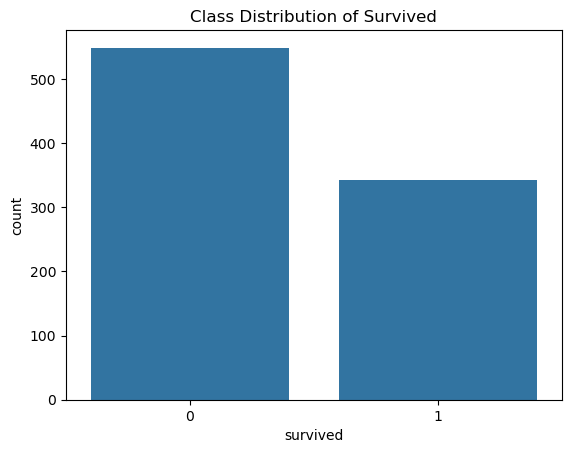

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,537,644,549,537
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Class Distribution and Descriptivre Statistics
sns.countplot(x='survived', data=titanic)
plt.title('Class Distribution of Survived')
plt.show()

titanic.describe(include='all')

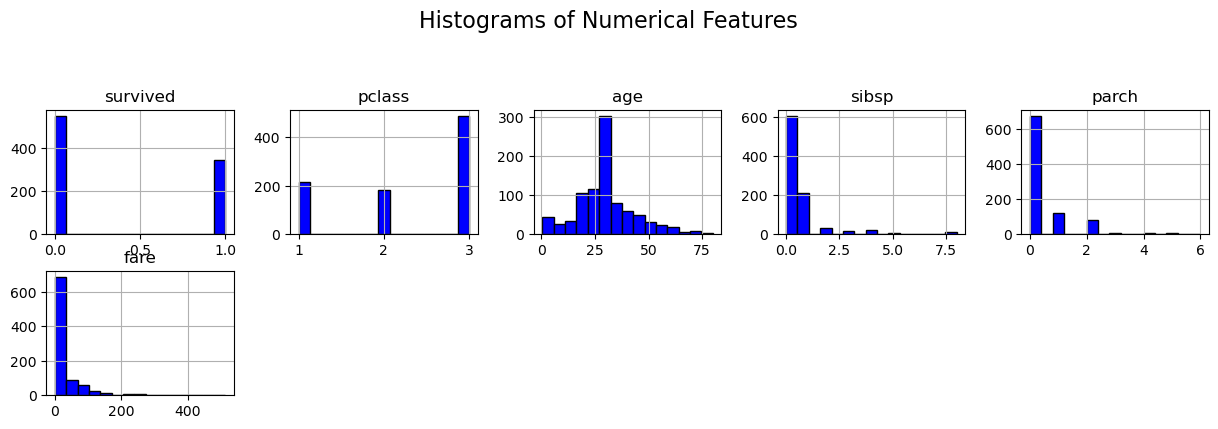

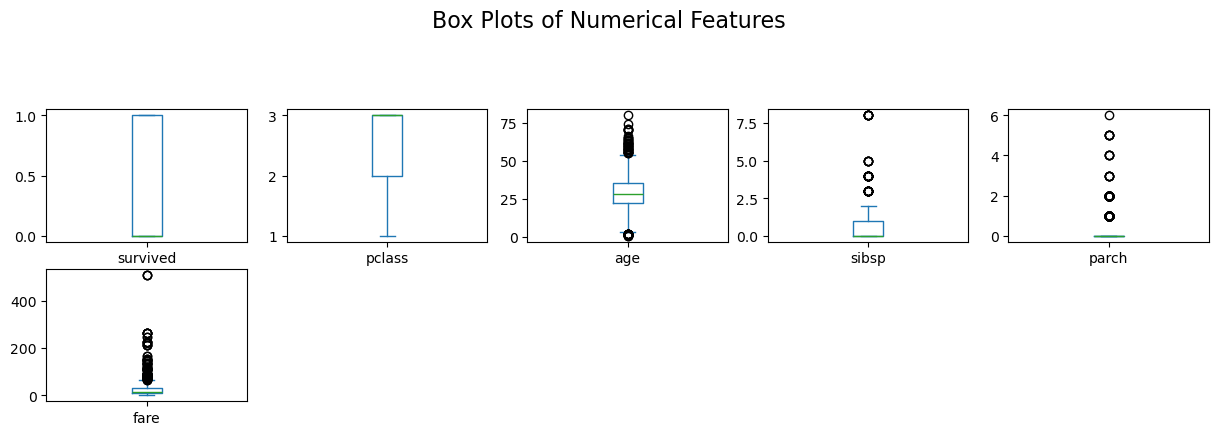

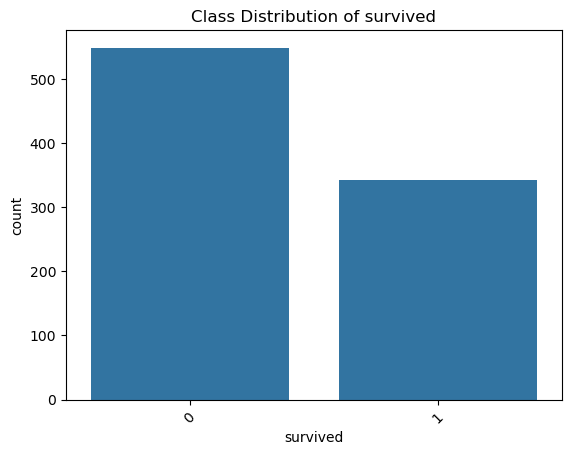

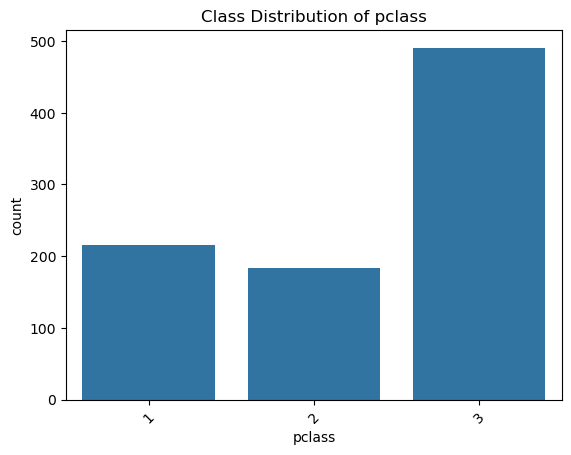

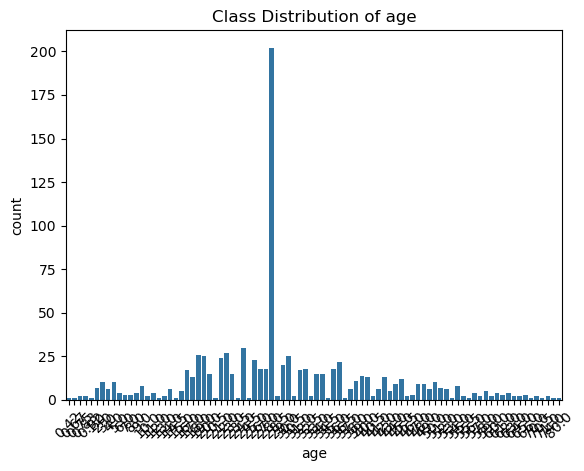

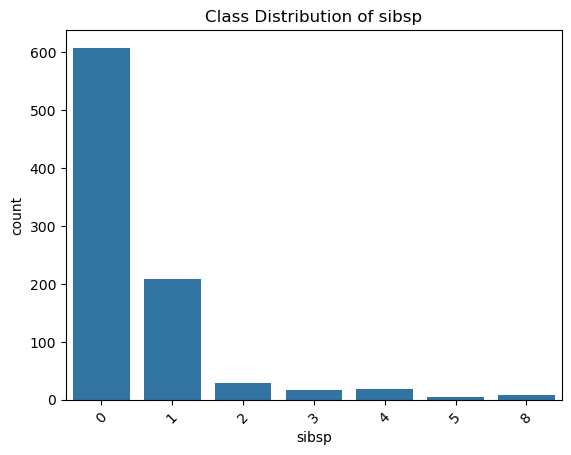

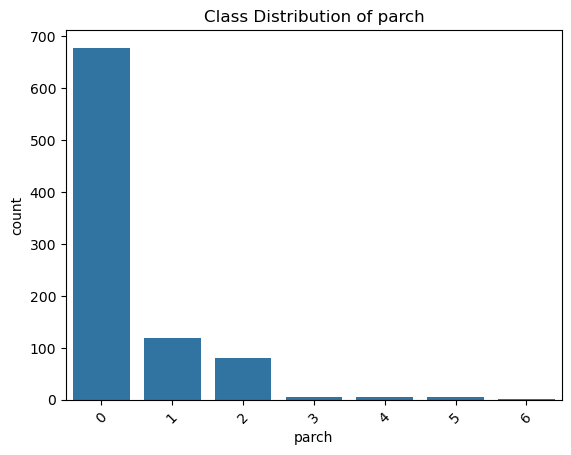

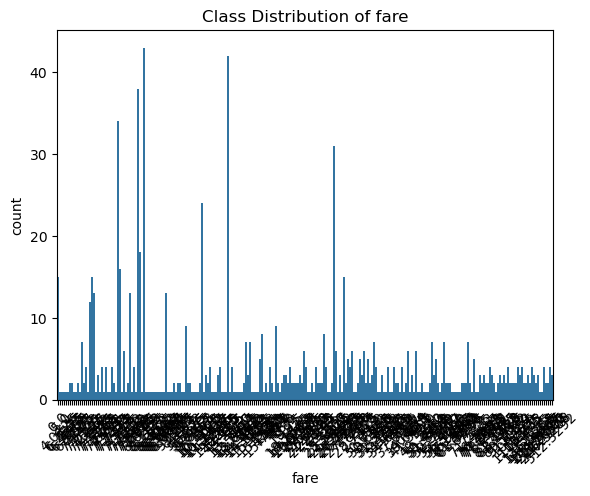

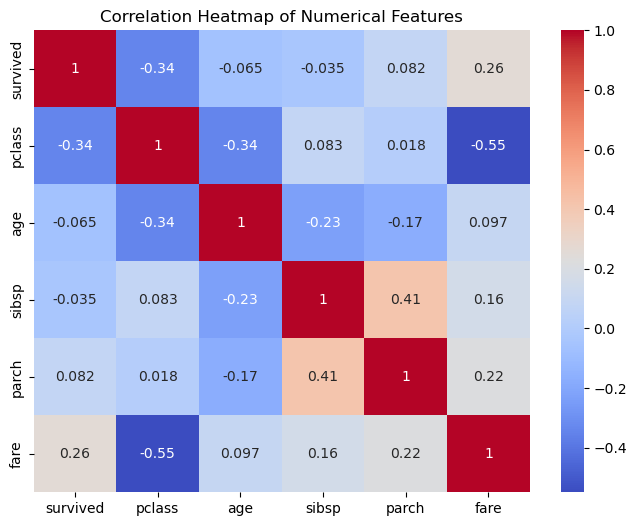

In [68]:
# data visualization

#Histograms for the numerical features
titanic[numerical_features[:8]].hist(bins=15, figsize=(15, 10), layout=(5, 5), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

#Box plots to visualize the distribution of numerical features
titanic[numerical_features[:8]].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), title='Box Plots of Numerical Features')
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.show()

#bar plot for class distribution
for feature in categorical_features:
    sns.countplot(x=feature, data=titanic)
    plt.title(f'Class Distribution of {feature}')
    plt.xticks(rotation=45)          
    plt.show()

#Correlation heatmap
plt.figure(figsize=(8,6))
correlation_matrix = titanic[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')  
plt.show()


In [59]:
#Data Processing
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
#standardizing  features
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
scaler = StandardScaler()
X= titanic[features]
y = titanic['survived']
X = scaler.fit_transform(X)
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing completed successfully.") 
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape) 
print("Class Distribution in Training Set:\n", y_train.value_counts(normalize=True))


Data preprocessing completed successfully.
Training set shape:  (712, 7)
Testing set shape:  (179, 7)
Class Distribution in Training Set:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [60]:
#Modeling the data and creating the model of the data
models ={ 
    "LogisticRegression": LogisticRegression(max_iter=500),
    "DecisionTree": DecisionTreeClassifier(random_state=42),   
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
print("\n Models Trained and Predictions Made")


 Models Trained and Predictions Made


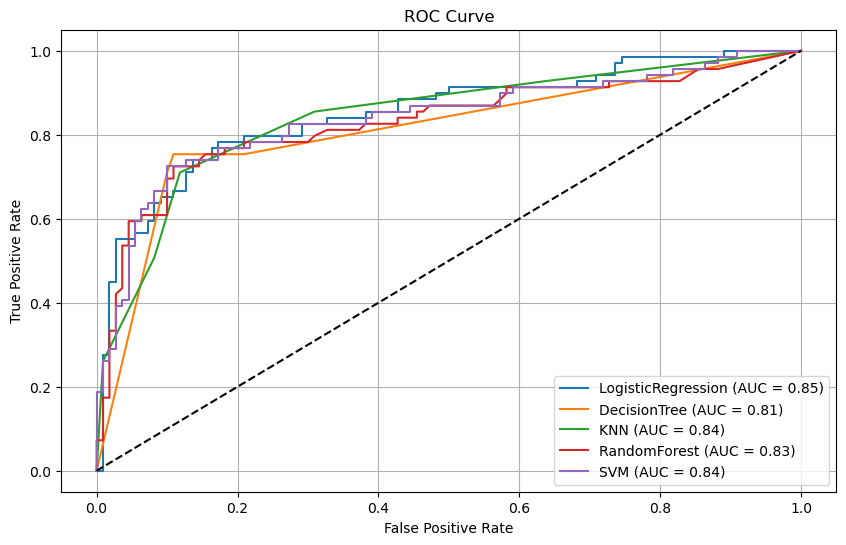


 Model Comprarison: 
                  Model  Accuracy  Precision    Recall  F1 Score       AUC
0  LogisticRegression  0.798883   0.779661  0.666667  0.718750  0.851910
1        DecisionTree  0.832402   0.800000  0.753623  0.776119  0.811001
2                 KNN  0.815642   0.790323  0.710145  0.748092  0.842819
3        RandomForest  0.826816   0.806452  0.724638  0.763359  0.829381
4                 SVM  0.815642   0.846154  0.637681  0.727273  0.838735


In [61]:
# Model Evaluation and ROC Curve Plotting
result = []
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    result.append([model_name, acc, prec, rec, f1, auc])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

result_df = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print("\n Model Comprarison: \n ", result_df)
